In [1]:
import staircase as sc
from imports import *
from datetime import datetime,timedelta
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


C:\Python38\lib\site-packages\cupy\_environment.py:207: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Python38\\lib\\site-packages\\cupy\\.data\\_wheel.json' mode='r' encoding='cp1252'>
  _preload_config = json.load(open(config_path))
..\hotstepper\Steps.py:138: DeprecationWarning: invalid escape sequence \{
  """


In [2]:
df = pd.read_csv(r"../data/page_views.csv")

vsteps = Steps.read_dataframe(df,'start','ends')

df.shape

(947, 3)

<AxesSubplot:>

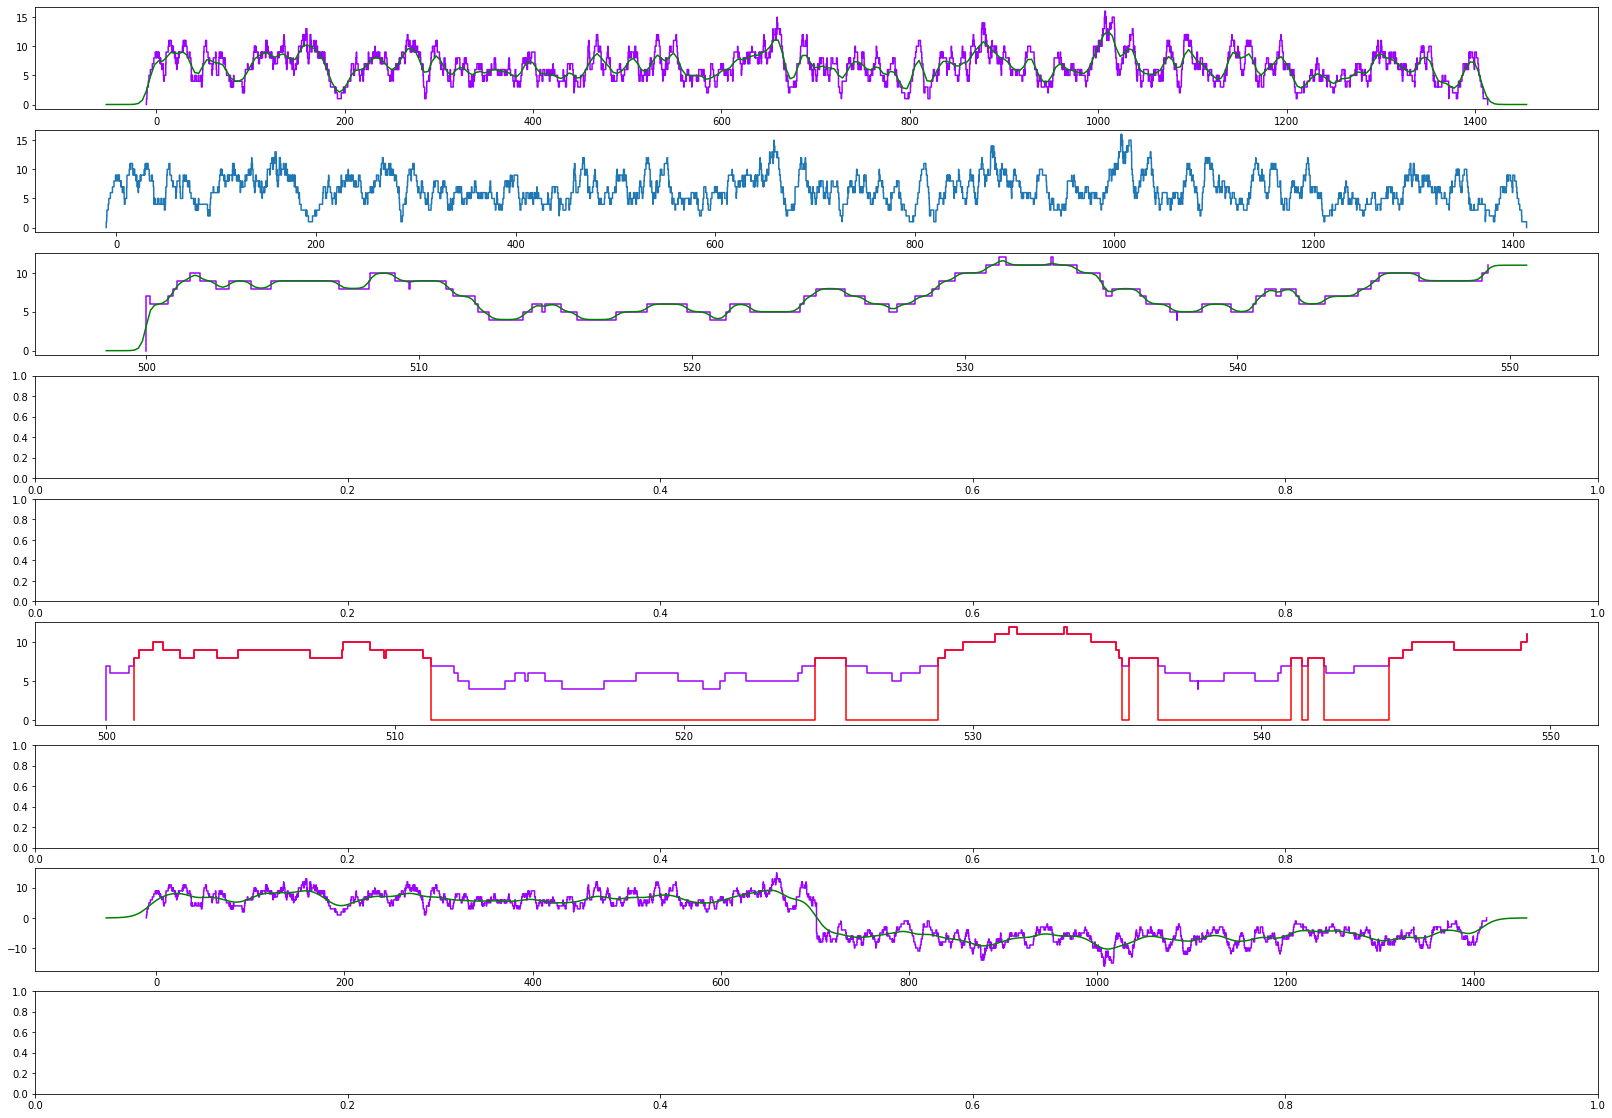

In [3]:
p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=9,figsize=(28,20))

st,se,span = vsteps.span()

#error here, this isn't the same as Step() - Step(start=st+0.5*span,weight=2)
haar0 = Step(end=st+0.5*span)
haar00 = Step(end=st+0.5*span,weight=1) - Step(start=st+0.5*span,weight=2)

haar = Step() - Step(start=st+0.5*span,weight=2)

#print(haar0,'| - |',haar)
#vsteps.rebase(tbase)
vs_clip = vsteps.clip(500,550)

vsteps.plot(ax=ax[0])
vsteps.smooth_plot(ax=ax[0],color='g')

queue = sc.Stairs().layer(df.start, df.ends)
queue.plot(ax[1])


vs_clip.plot(ax=ax[2])
vs_clip.smooth_plot(ax=ax[2],color='g')

# vsteps.histogram_plot(ax=ax[6],kind='bar')
# xx = vsteps.pacf_plot(10,ax=ax[3],kind='bar')
# xx.axhline(0,c='black',linestyle=':')
# vsteps.ecdf_plot(ax=ax[4],kind='bar')

vs_clip.plot(ax=ax[5])
(vs_clip>7).plot(ax=ax[5],color='r')
t = np.arange(-100,1500,0.1)
t2 = np.arange(490,520,0.1)

(vsteps*haar).plot(ax=ax[7])
(vsteps*haar).smooth_plot(ax=ax[7],color='g',ts_grain=0.5,smooth_factor=15)

<AxesSubplot:>

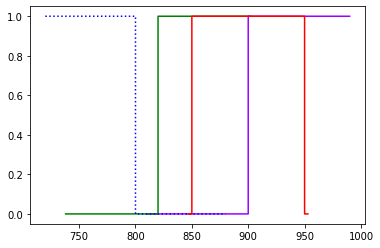

In [4]:
h = Step(900)
h2 = Step(820)
h3 = Step(end=800)
ss = Step(850,950)

ax = h.plot()
h2.plot(ax=ax,color='g')
h3.plot(ax=ax,color='blue',linestyle=':')
ss.plot(ax=ax,color='r')
